In [1]:
import itertools
import random

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


In [2]:
# Initialize graph
G=nx.Graph()

# Add nodes
nodes = [i for i in range(50)]
G.add_nodes_from(nodes)

# Add edges
n_edges = random.randint(200,400)
edges = [(random.randint(0,499),random.randint(0,499)) for i in range(n_edges)]
G.add_edges_from(edges)


In [16]:
# nodes
print G.nodes()[0:10]
print G.edges()[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(2, 319), (3, 275), (5, 255), (5, 7), (6, 127), (7, 408), (8, 14), (9, 314), (10, 169), (10, 427)]


In [4]:
FG=nx.Graph()

edges = [(random.randint(0,n_edges-1),random.randint(0,n_edges-1), random.random()) for i in range(n_edges)]

FG.add_weighted_edges_from(edges)

for n,nbrs in FG.adjacency_iter():
    for nbr,eattr in nbrs.items():
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(2, 209, 0.056)
(3, 132, 0.057)
(3, 170, 0.276)
(5, 40, 0.001)
(6, 193, 0.358)
(8, 152, 0.269)
(9, 210, 0.457)
(10, 37, 0.115)
(11, 101, 0.028)
(11, 63, 0.301)
(12, 63, 0.269)
(14, 192, 0.160)
(15, 30, 0.120)
(16, 91, 0.061)
(17, 118, 0.424)
(19, 214, 0.428)
(21, 26, 0.326)
(21, 76, 0.074)
(24, 43, 0.377)
(25, 193, 0.461)
(25, 196, 0.354)
(26, 21, 0.326)
(27, 145, 0.025)
(30, 15, 0.120)
(31, 114, 0.415)
(31, 181, 0.436)
(32, 41, 0.446)
(32, 217, 0.492)
(33, 117, 0.056)
(34, 66, 0.010)
(35, 91, 0.035)
(35, 60, 0.234)
(37, 210, 0.199)
(37, 10, 0.115)
(38, 136, 0.285)
(38, 193, 0.373)
(38, 215, 0.432)
(40, 5, 0.001)
(41, 32, 0.446)
(41, 210, 0.203)
(42, 177, 0.350)
(43, 24, 0.377)
(45, 99, 0.113)
(47, 142, 0.276)
(47, 79, 0.073)
(48, 139, 0.180)
(53, 66, 0.431)
(53, 199, 0.206)
(54, 104, 0.262)
(54, 93, 0.485)
(55, 206, 0.064)
(55, 62, 0.363)
(57, 117, 0.369)
(58, 203, 0.087)
(59, 96, 0.012)
(60, 35, 0.234)
(60, 205, 0.246)
(61, 145, 0.129)
(61, 129, 0.100)
(62, 65, 0.155)
(62, 55, 0.363)

In [12]:
# Centrality metrics
nx.connected_components(FG)
nx.degree(FG)
nx.closeness_centrality(FG)
nx.betweenness_centrality(FG)
nx.pagerank(FG, alpha=0.9)

{0: 0.006609451964089158,
 2: 0.0007912849482669439,
 3: 0.005324047258670102,
 4: 0.0057450133651080326,
 5: 0.005972559556374251,
 6: 0.004584222075832735,
 7: 0.005522465005504848,
 8: 0.0022232756777502134,
 9: 0.006034990863502317,
 10: 0.008006813423218594,
 11: 0.0027720345968964095,
 12: 0.002435543025867309,
 13: 0.00755533100549918,
 14: 0.004494018201620381,
 15: 0.004135259413899937,
 16: 0.0008224507321330568,
 17: 0.005291005291005291,
 18: 0.006899714075197056,
 19: 0.006803017150700725,
 20: 0.007693684435634186,
 21: 0.0054599087092409085,
 22: 0.0057366797314667446,
 23: 0.003006311240141445,
 24: 0.005291005291005291,
 25: 0.01092527744821549,
 26: 0.0018814016645603525,
 27: 0.005260174430801188,
 30: 0.004645534914355648,
 31: 0.00927054989461903,
 32: 0.005929718500752258,
 33: 0.005230992863095876,
 34: 0.005261506693635151,
 35: 0.004792450766709775,
 36: 0.0040144101511596355,
 37: 0.0018859042380380744,
 38: 0.00510281529581859,
 39: 0.005859333719924413,
 40:

In [13]:
# Clustering
clusters = nx.clustering(FG)
clusters[0:100]

TypeError: unhashable type

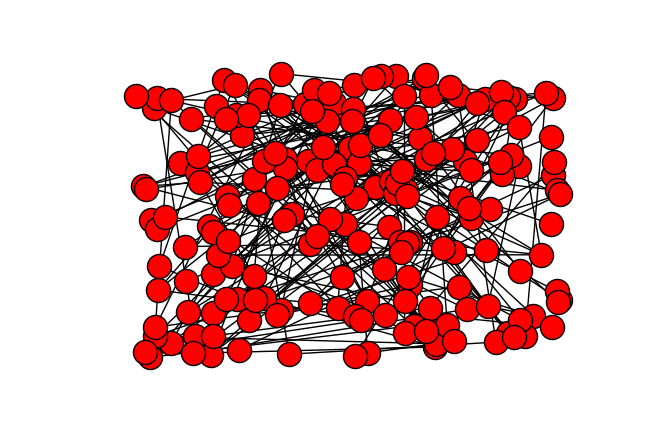

In [14]:
# plot graph
nx.draw_random(FG)
plt.show()

In [15]:
# Finding Motifs

target = nx.Graph()
target.add_edge(1,2)
target.add_edge(2,3)
num = 0

for sub_nodes in itertools.combinations(FG.nodes(),len(target.nodes())):
    subg = FG.subgraph(sub_nodes)
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target):
        print subg.edges()
    if num > 100:
        break
num += 1

[(0, 25), (25, 13)]
[(0, 25), (0, 23)]
[(0, 25), (25, 193)]
[(0, 25), (25, 196)]
[(209, 2), (209, 91)]
[(209, 2), (209, 148)]
[(209, 2), (209, 175)]
[(18, 132), (3, 132)]
[(72, 100), (3, 100)]
[(80, 100), (3, 100)]
[(100, 3), (3, 132)]
[(3, 100), (100, 149)]
[(3, 100), (100, 167)]
[(170, 3), (3, 100)]
[(170, 3), (3, 132)]
[(3, 132), (132, 195)]
[(170, 3), (170, 148)]
[(170, 3), (170, 164)]
[(176, 170), (170, 3)]
[(170, 3), (170, 212)]
[(90, 4), (4, 22)]
[(4, 22), (197, 22)]
[(65, 90), (90, 4)]
[(81, 90), (90, 4)]
[(40, 35), (40, 5)]
[(40, 49), (40, 5)]
[(40, 5), (5, 125)]
[(40, 5), (201, 5)]
[(40, 211), (40, 5)]
[(201, 5), (201, 95)]
[(201, 5), (201, 101)]
[(201, 5), (5, 125)]
[(201, 5), (201, 167)]
[(201, 5), (201, 199)]
[(25, 193), (6, 193)]
[(193, 6), (193, 38)]
[(193, 66), (193, 6)]
[(193, 75), (193, 6)]
[(113, 101), (113, 6)]
[(113, 116), (113, 6)]
[(113, 180), (113, 6)]
[(113, 6), (6, 193)]
[(177, 193), (6, 193)]
[(64, 159), (7, 159)]
[(8, 152), (152, 39)]
[(9, 210), (210, 37)]
[

In [ ]:
# Initialize graph
G=nx.Graph()

# Add nodes
nodes = [i for i in range(50)]
G.add_nodes_from(nodes)

# Add edges
n_edges = random.randint(200,400)
edges = [(random.randint(0,499),random.randint(0,499)) for i in range(n_edges)]
G.add_edges_from(edges)


# nodes
print G.nodes()[0:10]

# number of nodes
print "# nodes: ", G.number_of_nodes()

# edges
print G.edges()[0:10]

# number of edges
print "# edges: ",G.number_of_edges()


# Graph with attributes

FG=nx.Graph()

edges = [(random.randint(0,n_edges-1),random.randint(0,n_edges-1), random.random()) for i in range(n_edges)]

FG.add_weighted_edges_from(edges)

for n,nbrs in FG.adjacency_iter():
    for nbr,eattr in nbrs.items():
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))


# Centrality metrics
nx.connected_components(FG)
nx.degree(FG)
nx.closeness_centrality(FG)
nx.betweenness_centrality(FG)
nx.pagerank(FG, alpha=0.9)

# Clustering
clusters = nx.clustering(FG)
print clusters[0:100]


# plot graph
nx.draw_random(FG)
plt.show()

# Finding Motifs

target = nx.Graph()
target.add_edge(1,2)
target.add_edge(2,3)
num = 0

for sub_nodes in itertools.combinations(FG.nodes(),len(target.nodes())):
    subg = FG.subgraph(sub_nodes)
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target):
        print subg.edges()
    if num > 100:
        break
num += 1


